# Predicting Wine Quality Using Random Forest

## 1. Load and check data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_raw = pd.read_csv('data/winequality.csv')

In [3]:
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 1.1 Distribution

C:\Users\BPS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


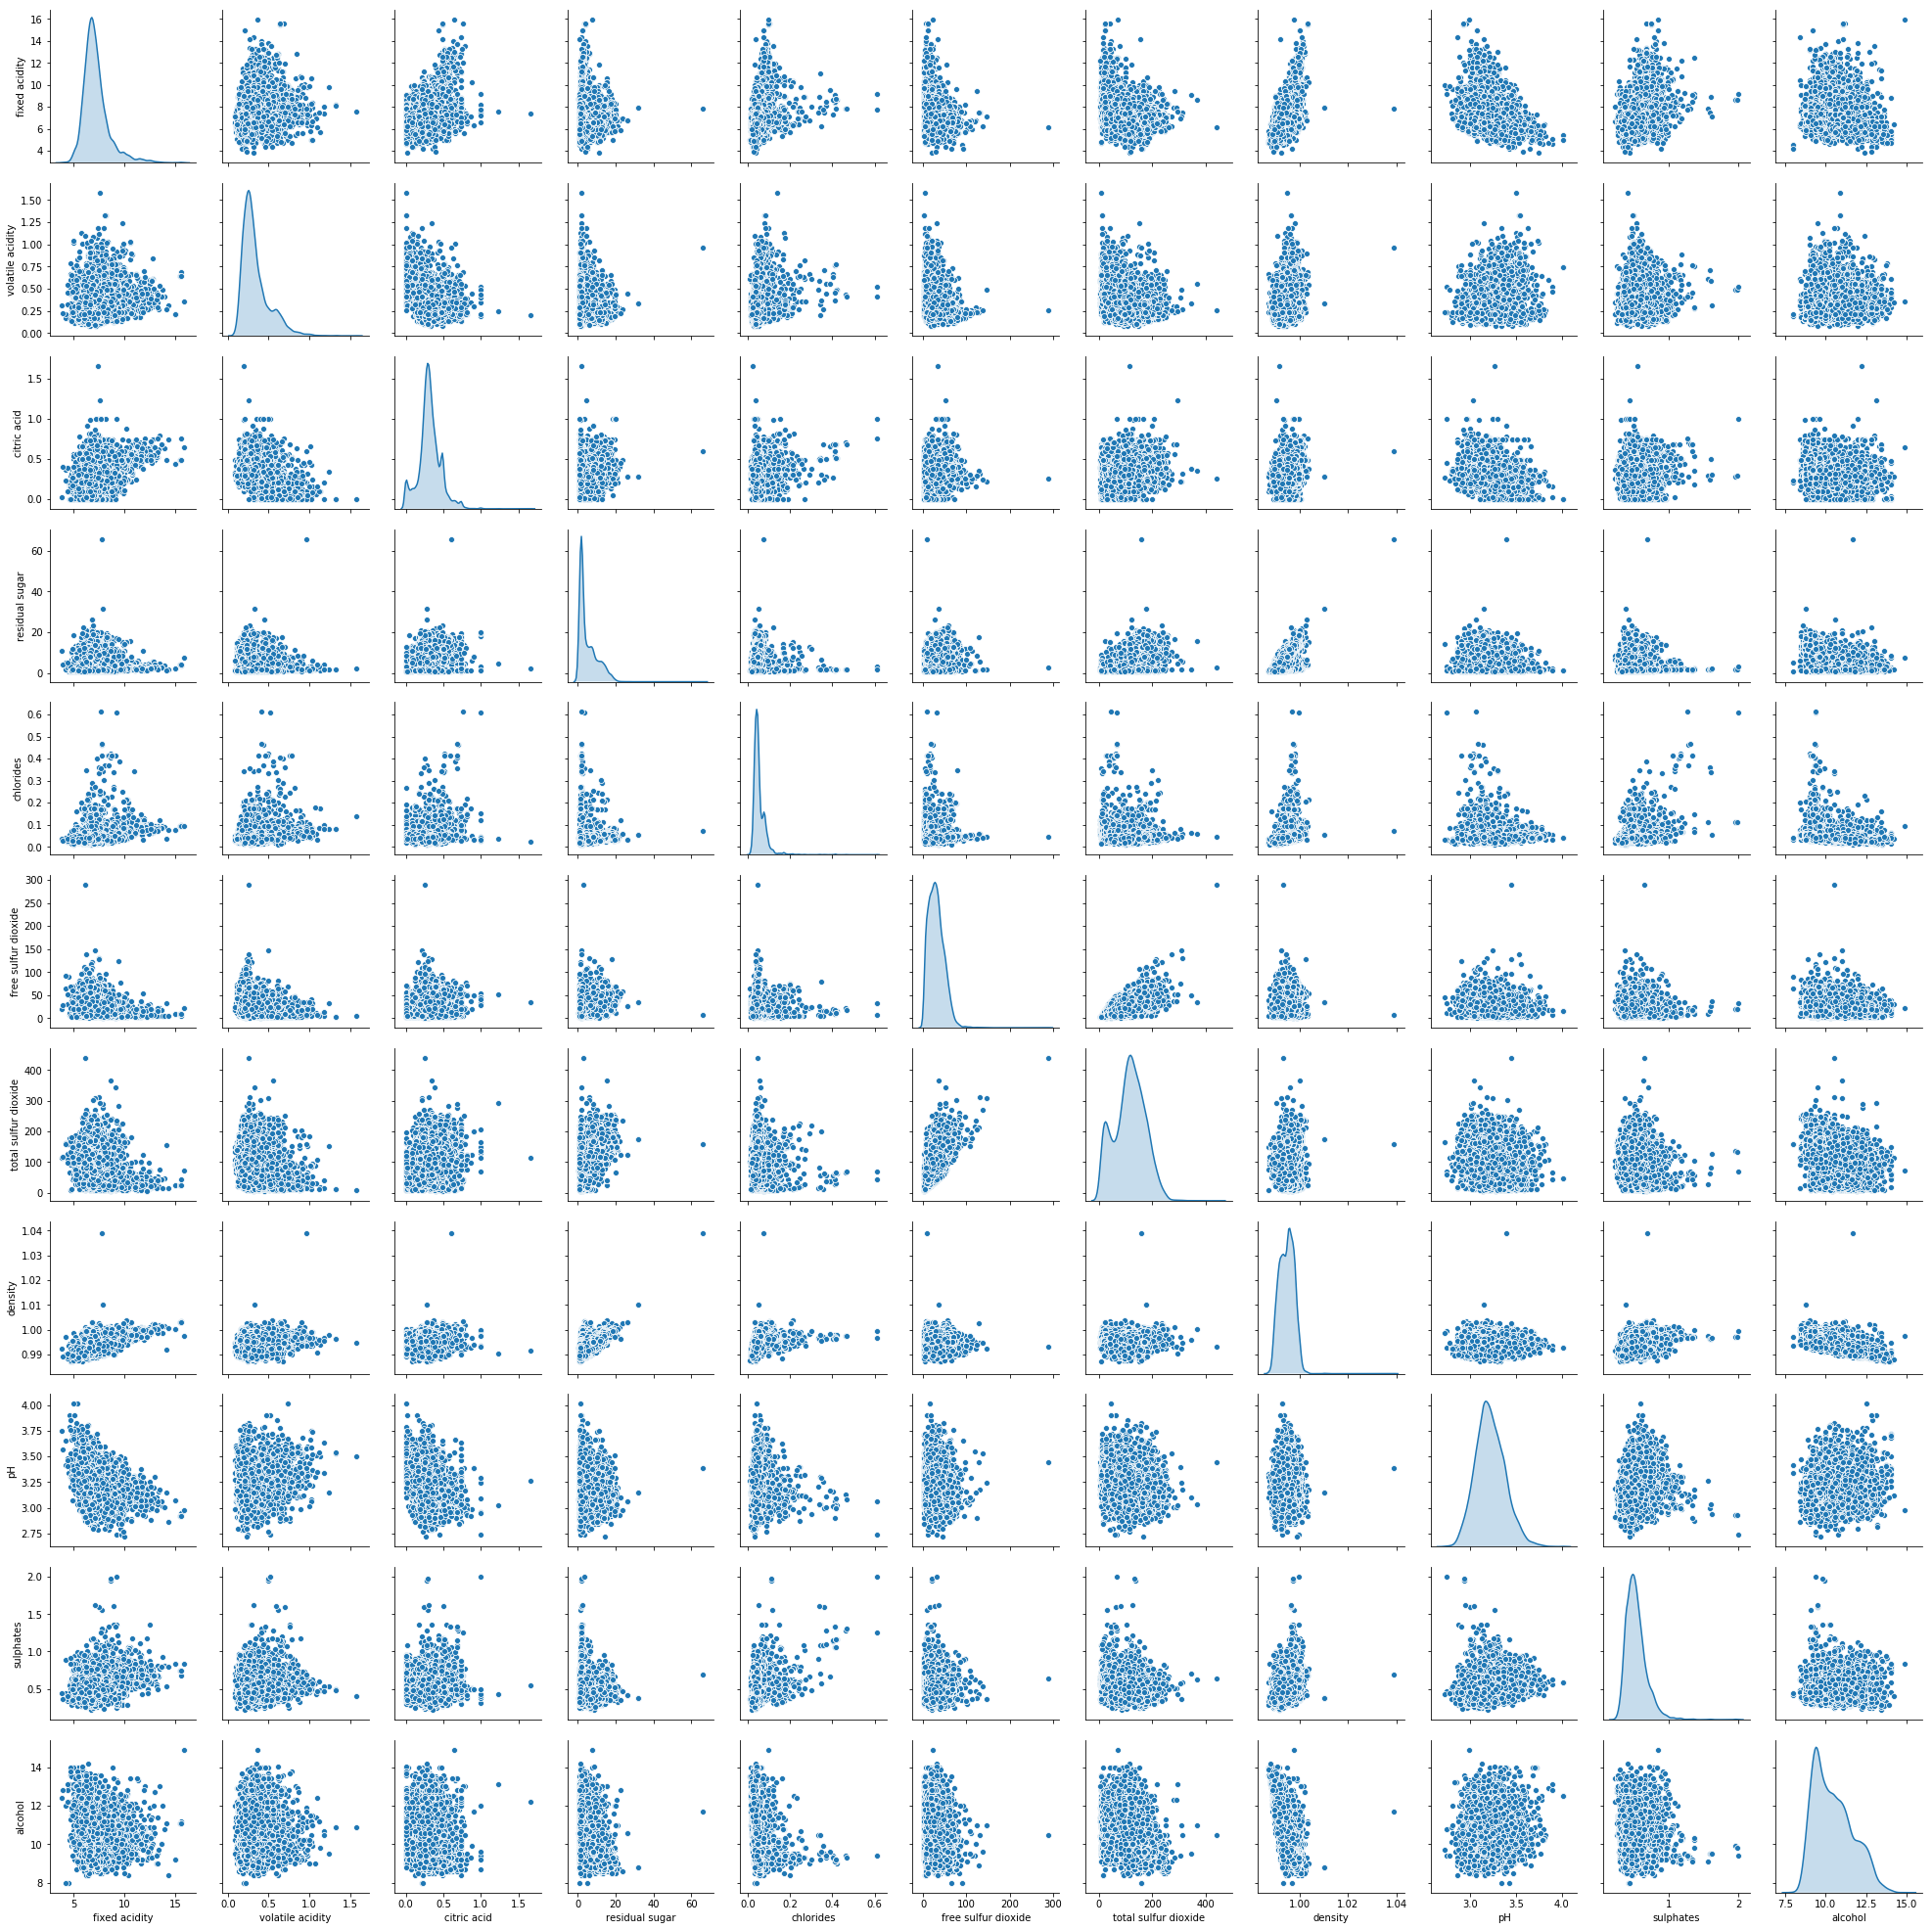

In [5]:
sns.pairplot(df_raw.drop(['quality','type'], axis=1), diag_kind='kde');

## 2 Feature Engineering

### 2.1 One Hot Encoding

In [6]:
df_clean = df_raw.copy()
#One Hot Encoding
type = df_clean.pop('type')
df_clean['red'] = (type == 'red')*1
df_clean['white'] = (type =='white')*1
df_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


### Split Data

In [10]:
X_train = df_clean.sample(frac=0.8,random_state=0)
X_test = df_clean.drop(X_train.index)
y_train = X_train.pop('quality')
y_test = X_test.pop('quality')

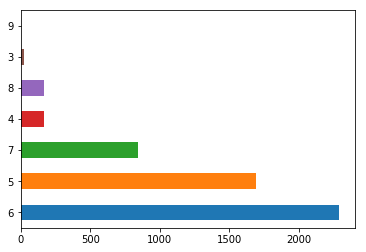

In [13]:
y_train.value_counts().plot(kind='barh');

### Modelling

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [15]:
m = RandomForestClassifier(n_estimators=100, n_jobs=-1)
m.fit(X_train, y_train)
rf_predictions = m.predict(X_test)

In [17]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.11      0.20        45
           5       0.75      0.73      0.74       445
           6       0.63      0.81      0.71       545
           7       0.77      0.48      0.59       232
           8       0.86      0.43      0.57        28
           9       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69      1299
   macro avg       0.57      0.37      0.40      1299
weighted avg       0.71      0.69      0.68      1299



C:\Users\BPS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\BPS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\BPS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
